In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset
df=pd.read_csv('loan_data.csv')

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.shape

(9578, 14)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [13]:
# missing value
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### No null value found. Ready to proceed

In [14]:
df['not.fully.paid'].value_counts()
# 0- full paid, 1 - not paid
# imbalanced data

0    8045
1    1533
Name: not.fully.paid, dtype: int64

#### In the give dataset the target variable of 0 class contains more data than 1 class. 0 class has around 8045 data and 1 class has around 1533 data. So a imbalance of data in noticed here as per my analysis.

## EDA of different factors of the dataset.

In [15]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

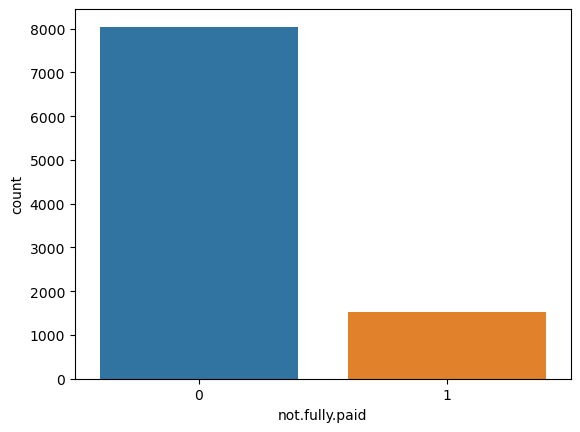

In [76]:
sns.countplot(x=df['not.fully.paid'])
plt.savefig('countplot.png')
plt.show()

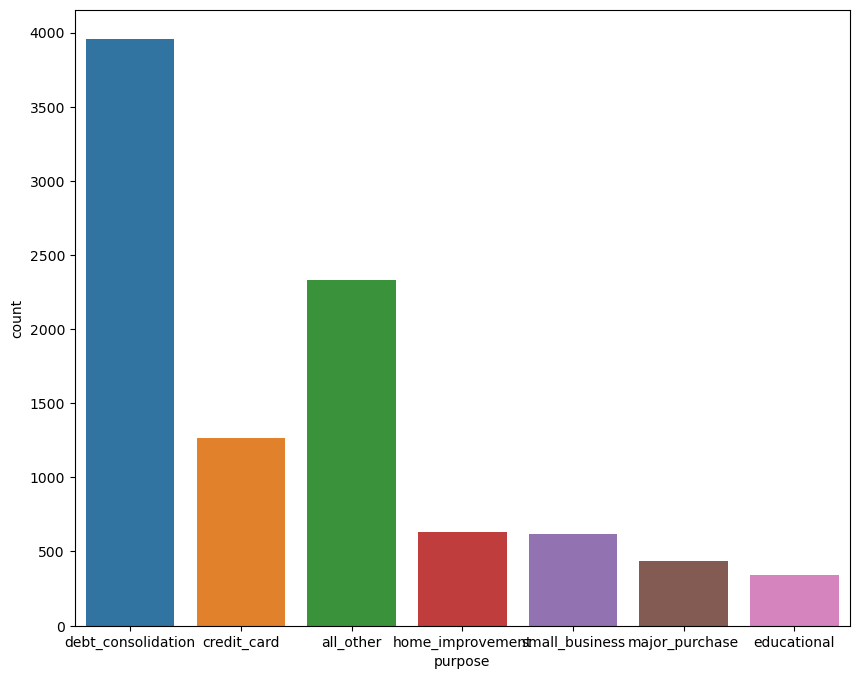

In [77]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['purpose'])
plt.savefig('countplot2.png')
plt.show()

#### As per the observation from above chart debt_consolidation has the highest number of data occurance with reference to the purpose column.

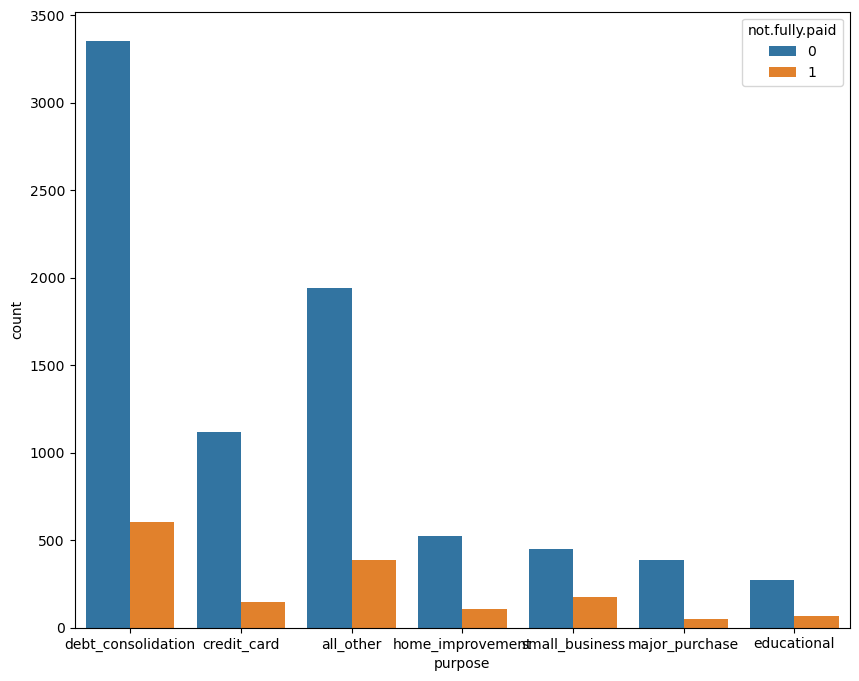

In [78]:
# purpose ---- not fully paid
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)
plt.savefig('countplot2.png')
plt.show()

#### As per above chart, from the debt_consolidation data not_full_paid=0 has the highest number of occurance.

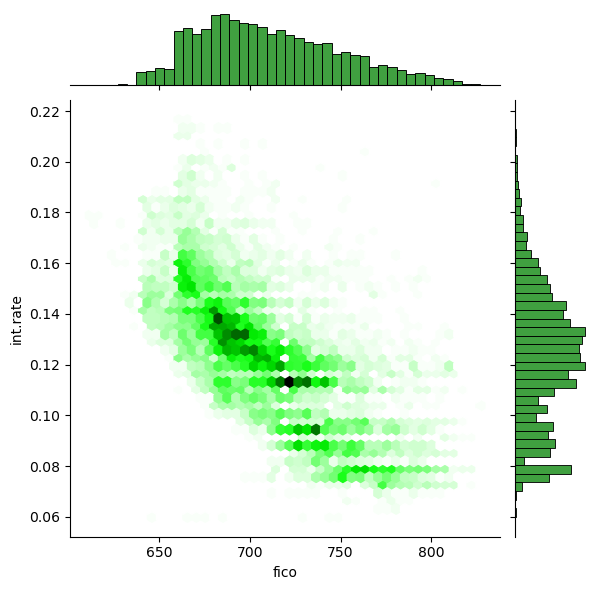

In [79]:
# bi variate analysis
sns.jointplot(x='fico',y='int.rate',data=df,kind='hex',color='g')
plt.savefig('Jointplot.png')
plt.show()

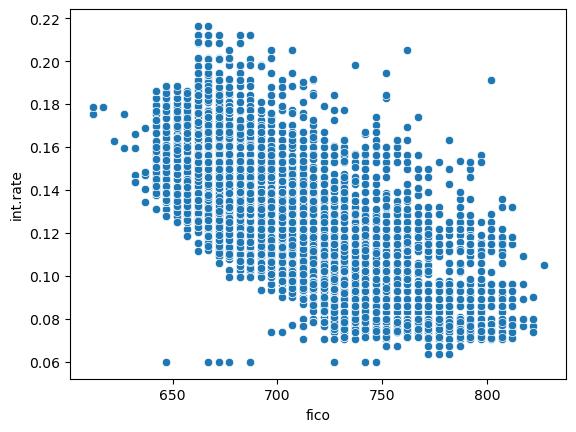

In [80]:
sns.scatterplot(x='fico',y='int.rate',data=df)
plt.savefig('Scatterplot.png')
plt.show()

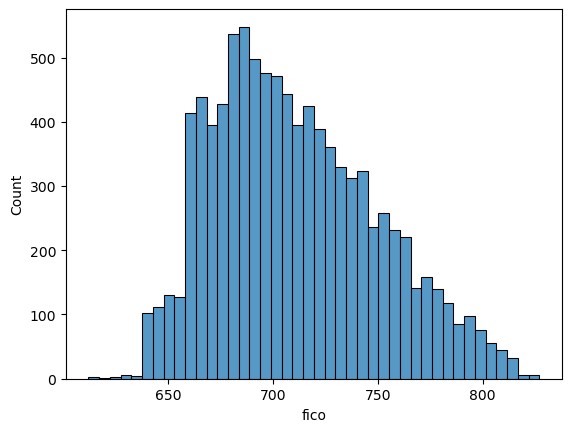

In [81]:
sns.histplot(df['fico'])
plt.savefig('histplot.png')
plt.show()

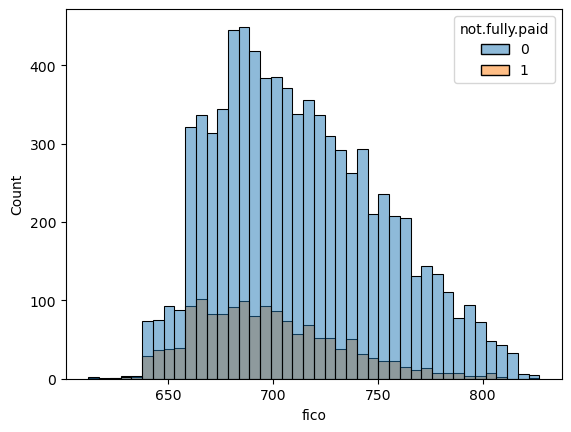

In [82]:
sns.histplot(x='fico',hue='not.fully.paid',data=df)
plt.savefig('histplot1.png')
plt.show()

Feature Transformation

##### Transform categorical values into numerical values (discrete)

In [23]:
# handle imbalanced dataset
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [24]:
not_fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [25]:
not_fully_paid_0.shape

(8045, 14)

In [26]:
not_fully_paid_1.shape

(1533, 14)

In [27]:
# resample
from sklearn.utils import resample
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)

In [28]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [29]:
# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [30]:
new_df['not.fully.paid'].value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [31]:
new_df.shape

(16090, 14)

In [32]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Using LabelEncoder to perform Feature Transformation by converting the categorical values into numerical values.

In [33]:
# convert purpose into num data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [35]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Additional Feature Engineering

### Need to check the correlation between all features & will drop those features which have a strong correlation

### This will help to reduce the number of features & will leave with the most relevant features.

In [36]:
new_df.corr().transpose()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.012819,-0.281133,0.057643,0.022957,-0.089764,0.376964,0.104494,-0.186621,-0.097121,-0.548261,-0.058617,-0.059581,-0.198948
purpose,0.012819,1.000000,0.153037,0.202618,0.118770,-0.040141,0.063894,0.060941,0.050805,-0.074617,0.043370,-0.003005,0.004688,0.058403
int.rate,-0.281133,0.153037,1.000000,0.276712,0.084610,0.206080,-0.685246,-0.104488,0.080539,0.423236,0.175648,0.148065,0.110993,0.215047
installment,0.057643,0.202618,0.276712,1.000000,0.477661,0.023006,0.095973,0.174049,0.257980,0.055020,-0.010936,-0.004405,-0.011076,0.062114
log.annual.inc,0.022957,0.118770,0.084610,0.477661,1.000000,-0.038630,0.099582,0.337939,0.403723,0.075415,0.037921,0.017088,0.019092,-0.047235
dti,-0.089764,-0.040141,0.206080,0.023006,-0.038630,1.000000,-0.224644,0.091962,0.189329,0.327599,0.026996,-0.020804,0.022769,0.050721
fico,0.376964,0.063894,-0.685246,0.095973,0.099582,-0.224644,1.000000,0.258221,0.009334,-0.501657,-0.188239,-0.207212,-0.160963,-0.206863
days.with.cr.line,0.104494,0.060941,-0.104488,0.174049,0.337939,0.091962,0.258221,1.000000,0.269405,0.016797,-0.019586,0.077249,0.071423,-0.040461
revol.bal,-0.186621,0.050805,0.080539,0.257980,0.403723,0.189329,0.009334,0.269405,1.000000,0.189338,0.014073,-0.032943,-0.039172,0.048107
revol.util,-0.097121,-0.074617,0.423236,0.055020,0.075415,0.327599,-0.501657,0.016797,0.189338,1.000000,-0.027680,-0.046589,0.079339,0.101615


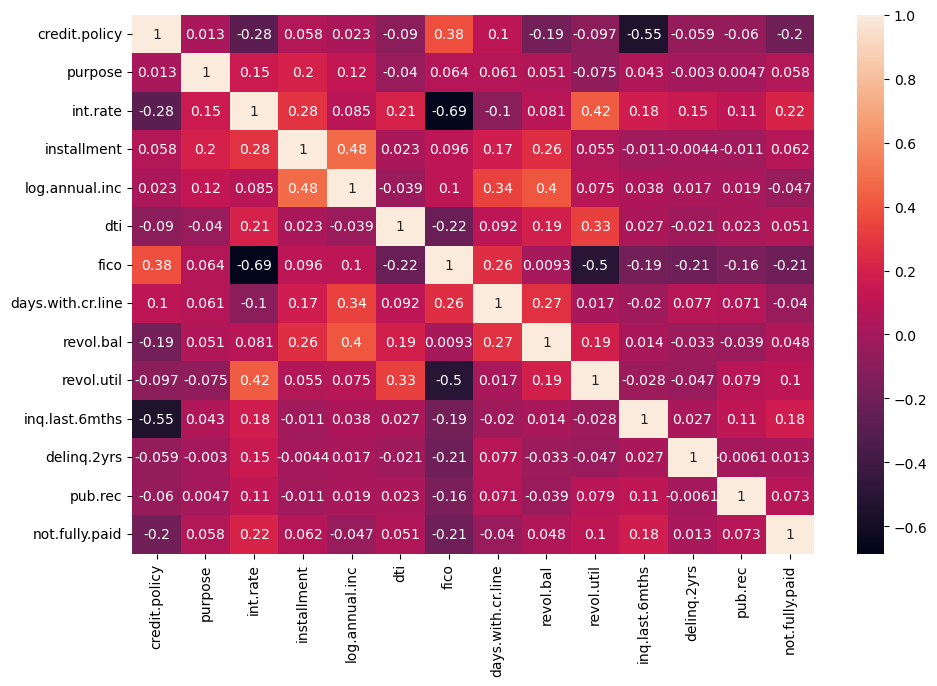

In [83]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)
plt.savefig('heatmap.png')
plt.show()

In [38]:
# see the sorted results
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.215047
fico                 0.206863
credit.policy        0.198948
inq.last.6mths       0.175383
revol.util           0.101615
pub.rec              0.073023
installment          0.062114
purpose              0.058403
dti                  0.050721
revol.bal            0.048107
log.annual.inc       0.047235
days.with.cr.line    0.040461
delinq.2yrs          0.012862
Name: not.fully.paid, dtype: float64

In [39]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### We are dropping few columns with highest corelation and keeping only limited columns

In [42]:
# take columns
X=new_df[['credit.policy','purpose', 'int.rate', 'installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [43]:
X.shape

(16090, 9)

In [44]:
y=new_df['not.fully.paid']

In [45]:
# Create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [46]:
X_train.shape

(12872, 9)

In [47]:
X_test.shape

(3218, 9)

In [48]:
X_train

,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
1577,1,1,0.0907,458.39,792,4658,10.7,0,0
1459,1,5,0.1148,725.31,762,6628,7.3,1,0
883,1,1,0.1450,640.24,682,32682,96.1,0,0
7255,1,0,0.1422,548.55,707,33113,97.4,2,0
2939,1,2,0.1600,285.66,702,21438,90.6,1,1
...,...,...,...,...,...,...,...,...,...
6202,1,6,0.2121,755.69,672,500,83.3,1,0
7318,1,5,0.1422,368.56,677,7634,50.9,0,0
8580,0,2,0.1134,119.27,687,82141,91.8,3,0
2178,1,2,0.1411,219.07,692,8959,90.5,0,0


In [49]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [50]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Create a deep learning model using Keras with Tensorflow backend

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
# create the architecture
# 2 ANN layer
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.20))


model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

# output layer
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
early_stop=EarlyStopping(monitor='val_loss',min_delta=0.001,mode='min',patience=10,verbose=1)

In [58]:
model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6302 - val_loss: 0.6480 - val_accuracy: 0.6168
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6273 - val_loss: 0.6479 - val_accuracy: 0.6190
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6281 - val_loss: 0.6481 - val_accuracy: 0.6200
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6265 - val_loss: 0.6480 - val_accuracy: 0.6215
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6283 - val_loss: 0.6478 - val_accuracy: 0.6215
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6260 - val_loss: 0.6480 - val_accuracy: 0.6165
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6284 - val_loss: 0.6479 - val_accuracy: 0.6172
Epoch 8/50
51/51 [==

In [59]:
history=model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6315 - val_loss: 0.6463 - val_accuracy: 0.6243
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6328 - val_loss: 0.6458 - val_accuracy: 0.6280
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6325 - val_loss: 0.6465 - val_accuracy: 0.6271
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.6239 - val_loss: 0.6461 - val_accuracy: 0.6249
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.6306 - val_loss: 0.6461 - val_accuracy: 0.6252
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.6304 - val_loss: 0.6459 - val_accuracy: 0.6265
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6295 - val_loss: 0.6458 - val_accuracy: 0.6283
Epoch 8/50
51/51 [==

In [60]:
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.6349


[0.6433086395263672, 0.6348663568496704]

In [61]:
y_pred=model.predict(X_test)

101/101 [==============================] - 0s 1ms/step


In [62]:
y_pred

array([[0.48226872],
       [0.7590577 ],
       [0.5538002 ],
       ...,
       [0.66819197],
       [0.49153423],
       [0.5063078 ]], dtype=float32)

In [63]:
predictions=(y_pred>0.5).astype('int')

In [64]:
predictions

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [65]:
y_test

5033    0
8164    1
9048    1
3109    0
8346    1
       ..
4421    0
2149    0
1766    0
430     0
5594    0
Name: not.fully.paid, Length: 3218, dtype: int64

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(predictions,y_test)

0.6348663766314481

In [67]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1669
           1       0.62      0.64      0.63      1549

    accuracy                           0.63      3218
   macro avg       0.63      0.64      0.63      3218
weighted avg       0.64      0.63      0.63      3218



In [68]:
model.save('loan_default1.h5')

C:\Users\10030099\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model2 Architecture


In [69]:
# batch Normalization
from tensorflow.keras.layers import BatchNormalization

In [70]:
# create the architecture model2
# First ANN layer
model1=Sequential()
model1.add(Dense(128,activation='relu',input_shape=[9]))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# Second ANN layer
model1.add(Dense(64,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))


# third ANN layer
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# output layer
model1.add(Dense(1,activation='sigmoid'))

In [71]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [72]:
# compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
history=model1.fit(X_train,y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/100
51/51 [==============================] - 2s 9ms/step - loss: 0.7695 - accuracy: 0.5736 - val_loss: 0.6634 - val_accuracy: 0.5991
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 0.7053 - accuracy: 0.5875 - val_loss: 0.6556 - val_accuracy: 0.6094
Epoch 3/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6794 - accuracy: 0.6050 - val_loss: 0.6539 - val_accuracy: 0.6007
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6726 - accuracy: 0.5998 - val_loss: 0.6520 - val_accuracy: 0.6072
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.6141 - val_loss: 0.6503 - val_accuracy: 0.6203
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.6088 - val_loss: 0.6498 - val_accuracy: 0.6231
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6172 - val_loss: 0.6466 - val_accuracy: 0.6206
Epoch 8/100
5

In [74]:
model1.evaluate(X_test,y_test)

101/101 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7063


[0.5638065934181213, 0.7063393592834473]

In [75]:
model1.evaluate(X_train,y_train)

403/403 [==============================] - 1s 1ms/step - loss: 0.4888 - accuracy: 0.7710


[0.4888094365596771, 0.7709757685661316]

# Hyparameter tuning in Keras

In [65]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 8.7 MB/s eta 0:00:00


In [66]:
import keras_tuner
import tensorflow

Using TensorFlow backend


In [67]:
def build_model(hp):
    model=Sequential()

    # first hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))

    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))


    # Second hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))

    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

     # third hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))

    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

    model.add(Dense(1,activation='sigmoid'))

    learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)

    model.compile(loss='binary_crossentropy',
                  optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                 metrics=['accuracy'])
    return model

In [68]:
import keras_tuner as kt

In [69]:
build_model(kt.HyperParameters())

In [70]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=10
                      )

In [71]:
rtuner.search(X_train,y_train,
             epochs=50,validation_data=(X_test,y_test),
             verbose=2)

Trial 10 Complete [00h 02m 24s]
val_accuracy: 0.6277191042900085

Best val_accuracy So Far: 0.7560596466064453
Total elapsed time: 00h 24m 39s


In [72]:
par=rtuner.get_best_hyperparameters()

##### for h_param in [f"units{i}" for i in range(1,4)]+['learning_rate']:
    print(h_param,rtuner.get_best_hyperparameters()[0].get(h_param))


In [73]:
par

In [74]:
models=rtuner.get_best_models()

In [75]:
len(models)

1

In [76]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               4480      
                                                                 
 batch_normalization (Batch  (None, 448)               1792      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 448)               201152    
                                                                 
 batch_normalization_1 (Bat  (None, 448)               1792      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 448)               0

In [77]:
y_pred=models[0].predict(X_test)>=0.5

101/101 [==============================] - 0s 2ms/step


In [78]:
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7560596643878186

### After applyting hyper parameter tuning we noticed that the final accuracy score has come to 0.75 which is a very good outcome